# **ExoEvo**
A 1-D tool for simulating thermal evolution of model planets.

------

## **Thermal Evolution 101:** Qualitative
Planetary interiors cool over time. As they cool, their interiors become more and more **viscous** (resistant to flow). At some point in a planet's lifetime, mantle **convection** becomes so inefficient that **conduction** becomes the dominant mode of heat transport through the planetary interior. A strictly-conductive planet can be considered geologically dead, since only convection enables large-scale geochemical cycling and delivery of fresh material to planetary surfaces.

A planet's cooling rate depends on its heat **sources and sinks.** Sources include the exponential decay of radionuclides, any gravitational energy released as heat during accretion and differentiation, and heat generated from tidal dissipation. The mode by which heat is most efficiently transferred (convection or conduction) controls the efficiency with which that heat can be emitted, thus guiding the sink term.

------

## **Thermal Evolution 201:** Quantitative

Boundary-layer theory suggests that the heat flux across a (stagnant-lid) planetary surface should be proportional to the vigor of convection within its interior. This relationship is often explained using a scaling law relating two unitless quantities, the **Nusselt Number** ($Nu$) and **Rayleigh Number** ($Ra$), by an exponent $\beta \approx$ 1/3:

### $Nu \propto Ra^{\beta}$

The Nusselt number is most simply described as the relative efficiency of convective heat transfer compared to a strictly conductive transfer regime. 
### $Nu=\frac{Q}{k A\left(T_{i} / d\right)}$
where:
* $ Nu = $ Nusselt number, unitless
* $ Q = $ convective heat flux, W/m$^{2}$
* $ k = $ thermal conductivity, W m$^{-1}$ K$^{-1}$
* $ A = $ surface area through which heat flows, m$^{2} \approx 4 \pi R_{p}^{2} $
* $ T_{i} = $ mantle potential temperature, K
* $ d = $ depth/thickness of convecting mantle, m  $ \approx R_{p}-R_{c} $


### $Ra=\frac{\alpha \rho g T_{i} d^{3}}{\kappa \eta\left(T_{i}\right)}\text{        }$ or $\text{         }Ra=\frac{\alpha C_{p} \rho^{2} g T_{i} d^{3}}{k \eta\left(T_{i}\right)}$
where:
* $ Ra = $ Rayleigh number, unitless
* $ \alpha = $ thermal expansivity, 1/K
* $ \rho = $ density, kg/m$^{3}$
* $ g = $ surface gravity, m/s$^{2}$ 
* $ T_{i} = $ mantle potential temperature, K
* $ d = $ depth/thickness of convecting mantle, m  $ \approx R_{p}-R_{c} $
* $ \kappa = $ thermal diffusivity, m$^{2}$/s = $ \left( k  / (\rho C_{p})\right)$
* $ k = $ thermal conductivity, W m$^{-1}$ K$^{-1}$
* $ C_{p} = $ specific heat capacity, J kg$^{-1}$ K$^{-1}$
* $ \eta\left(T_{i}\right) =  $ viscosity at temperature $T_{i}$, Pa s

[comment]: <> (add derivation, followed by translation to generalizable terms e.g. Mp, CMF, Rp, CRF)

------

## **Thermal Evolution 301:** Temperature-dependent
Each thermal and thermo-mechanical property listed above (i.e. thermal diffusivity $\kappa$, thermal conductivity $k$, heat capacity $C_{p}$, and thermal expansivity $\alpha$) is a result of the planet's composition and structure. These properties vary with temperature, but most 1-D thermal evolution models assume a **single, static value** for each variable. One notable exception is temperature-dependent viscosity $\eta\left(T_{i}\right)$, which is often expanded to an Arrhenius form:

### $\eta\left(T_{i}\right) = \eta_{n} exp({\frac{E_{a}}{RT_{i}}})$
where:
* $ \eta\left(T_{i}\right) =  $ viscosity at temperature $T_{i}$, Pa s - *material-dependent*
* $ \eta_{n} =  $ viscosity prefactor, Pa s - *material-dependent*
* $ E_{a} =  $ activation energy for diffusion creep, kJ/mol - *material-dependent*
* $ R = $ ideal gas constant = 8.314 J/(mol K)
* $ T_{i} = $ mantle potential temperature, K

[comment]: <> (explain how Foley & Smye 2018 eq.3+4 follows from Nu-Ra scaling - include Frank-Kamenetskii)

**A static-value approach for $\kappa, k, C_{p},$ and $\alpha$ is usually sufficient for studies of Earth's thermal evolution.** After all, Earth's maximum cooling lifetime is limited by our Sun's main-sequence lifetime. 4.5 billion years down... 8 billion years to go! However, most detected rocky exoplanets orbit M-dwarf stars, which mature and brighten almost imperceptibly over billion-year timescales. Around such a long-lived star, an exoplanet's interior could experience a much wider range of internal temperatures and dynamical regimes. **A more dynamic approach may help to identify more subtle variations within and between exoplanetary thermal evolution pathways.**

[comment]: <> (perhaps calculate max and min plausible Cp above whatever Tp connects to ~Ra_crit for each mineral included so far?)
[comment]: <> (would show how, e.g., a particularly high influx of heat early on could be pivotal depending on composition, OR depending on starting T for a single composition)

------

## **Thermal Evolution 401:** Dependencies in Practice
Given all this, how do *composition, compositional uncertainty,* and *temperature sensitivities in thermal behavior* shape the long-term thermal evolution of planetary interiors?

From this question, many sub-questions arise. Some are tractable with **forward models** like this one. Some require **inversion methods**, in which hundreds of forward model results are compared to an actual dataset, to narrow down what range of model inputs most readily explains the observed outputs.

Among the sub-questions which may be answerable with a well-designed set of evolutionary paths:
* Without any external forcings, how long could a temperate-surface rocky planet remain geologically active?
* How sensitive are planets of a given bulk composition to varying initial conditions, e.g. radionuclide abundance or starting temperature?
* How do planets of differing composition respond to the same initial conditions? When do their thermal histories tend to converge or diverge?
* If we want to probe a planet's history for external forcing events... what minerals (and associated stellar refractory element ratios) would allow for a given thermal regime at a given planetary age?
* Alternatively, to test if planet and stellar properties are correlated... what minerals and radionuclide abundances would allow for a given thermal regime at a given planetary age? Are those compositions reasonable and consistent with stellar refractory element ratios?

**`ExoEvo` is hoping to ease such multi-dimensional investigations.** It's also hoping to provide programming neophytes with a decent open-source template for a well-documented, human-readable, modular, version-controlled, web-accessible scientific widget. It will eventually include a series of workflows for streamlining data analysis and model grid generation. But for now, it's just a widget, and a widget in progress at that. So...

<h3>

```diff
- Interpret all outputs with caution.
```

</h3>


------

## Last little details...

#### Model Options for **'method'** variable:
* **'dynamic'** - calculates $\alpha, Cp,$ and $k$ for a given bulk mineralogy, adjusting them and $\eta\left(T_{i}\right)$ for temperature dependencies at each timestep
* **'static'** - $\alpha, Cp,$ and $k$ are set to static reference values from a single mantle potential temperature; $\eta\left(T_{i}\right)$ is still adjusted at each timestep

[comment]: <> (static values are currently only one mineralogy from Foley & Smye 2018, DOI:10.1089/ast.2017.1695... need to add Ev/visc0/c1 for others)

[comment]: <> (* 'dorn' - Benchmark case: Dorn, et al. 2018, DOI:10.1051/0004-6361/201731513)
[comment]: <> (* 'foley' - Benchmark case: Foley and Smye 2018, DOI:10.1089/ast.2017.1695)
[comment]: <> (* 'korenaga' - Benchmark case: Korenaga 2006, DOI:10.1029/164GM03)

#### Model Options for **'mineral'** variable:
* 'forsterite'
* 'fayalite'
* 'orthoenstatite'
* 'clinoenstatite'
* 'periclase'
* 'corundum'
* 'spinel'
* 'diopside'
* 'diamond'
* 'ca-al pyroxene'

#### Column numbers in **Evolution** output array:
0.  time in Ga
1.  temperature in C
2.  Rayleigh number
3.  radiogenic heat produced
4.  heat loss through surface
5.  Urey ratio = heat production/heat loss

------

## Import external and internal packages.
Note that all internal packages are `___.py` files, and are found in the same directory as this file (`ExoEvo.ipynb`).

In [1]:
#Import external packages
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

#Import internal packages
import evolve
import fromexo
import getall as get
import printall as prnt
from printall import Pe as Pe #print scientific notation, 4 decimal
from printall import Pf as Pf #print float, 4 decimal

#print('Available minerals:', get.keys['minerals'])


## User input values:

In [2]:
#Earth = defaults to benchmark static values if this field isn't one of the minerals listed
minerals=('forsterite','fayalite','orthoenstatite','clinoenstatite','periclase', \
          'corundum','spinel','diopside','diamond','ca-al pyroxene')
fractions=[0.60, 0.10, 0.05, 0.00, 0.249, \
           0.00, 0.00, 0.00, 0.001, 0.00]

method='dynamic'      #static or dynamic thermal parameters
Mpl=1.0             #Planet mass in Me                                 Earth = 1.0
Rpl=1.0             #Planet radius in Re                               Earth = 1.0
CMF=0.3333          #Core mass fraction                                Earth = 0.3333
CRF=0.5437          #Core radius fraction                              Earth = 0.5437
Qp=1.0              #Relative heat production per kg mantle, vs Earth  Earth=1.0
Ts=300.0            #Surface temperature in K                          Earth=300.0
Tp0=2000.0           #starting mantle potential temperature in K       Earth=2000.0
dt=0.1              #timestep size, in Ga
tmax=4.55           #ending time, in Ga                                Earth=4.55


### Build your mantle and acquire its unchanging material properties.

In [3]:
Mp,Mc,Rp,Rc=get.SIunits(Mpl,CMF,Rpl,CRF)
d,Vm,Sa,pm,g=get.build(Mp=Mp,Mc=Mc,Rp=Rp,Rc=Rc)
c1,Ev,visc0=get.TdepVisc(minerals=minerals, fractions=fractions)

params={"Mp":Mp,"Mc":Mc,"Rp":Rp,"Rc":Rc,"d":d,"Vm":Vm,"Sa":Sa,"pm":pm,"g":g,"c1":c1,"Ev":Ev,"visc0":visc0}

prnt.unchanging(params)

Planet mass:	 5.9700e+24 kg
Core mass:	 1.9898e+24 kg
Planet radius:	 6.3710e+06 m
Core radius:	 3.4639e+06 m
Mantle depth:	 2.9071e+06 m
Surface area:	 5.1006e+14 m2
Density:	 4378.1238 kg m-3
Surf gravity:	 9.8164 m s-2
Visc constant:	 0.5000
Activ. energy:	 3.0000e+05 J/mol
Visc prefactor:	 4.0000e+10 Pa s


### Evolve your planet over time.

In [4]:
Hts=[]             #A list of lists; column names are in get.keys['columns']
t=0.0              #Keep Hts=[], Tp=Tp0, and t=0.0 here, so we can reset values and run again.
Tp=Tp0
dt=0.01

start=time.time()
while t <= tmax:
    alpha,cp,k=get.thermals(minerals,fractions,Tp)
    
    if method=='static':
        alpha,cp,k=get.thermals(minerals,fractions,1625)
        #alpha,cp,k,pm=3.7e-5,1250.,5.0,3340. #Uncomment for common benchmark values
        
    viscT=get.viscosity(Ev,visc0,Tp)
    Ra=get.rayleigh(d,g,pm,Tp,Ts,viscT,alpha,cp,k)
    
    production=evolve.produce_heat(Mp,Mc,Qp,t)
    loss=evolve.flux_heat(Sa,c1,k,Tp,d,Ra,Ev)
    dTp=(dt*get.seconds*(production-loss))/(cp*pm*Vm) #Potentially change to (cp*Mp)?
    Hts.append([t,Tp-273.15,Ra,production,loss,production/loss])
    
    Tp=Tp+dTp
    t=t+dt

    
end=time.time()
Evolution=np.asarray(Hts)

print("Program running time: ", Pf(end-start), " seconds")

print(get.keys['columns'])
print([Pf(t), Pf(Tp), Pe(Ra), Pe(production), Pe(loss), Pf(production/loss)])

Program running time:  0.0531  seconds
['time', 'temp', 'Ra', 'production', 'loss', 'urey']
['4.5600', '1829.7854', '3.8050e+09', '2.8137e+13', '3.5946e+13', '0.7828']


#### Plot your planet's temperature evolution.

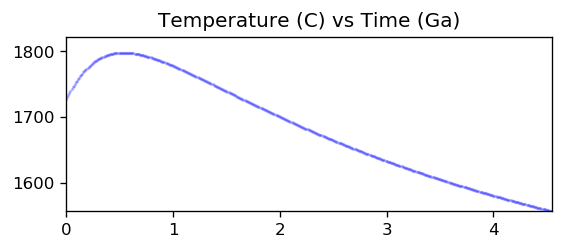

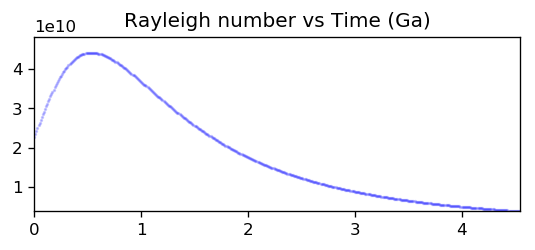

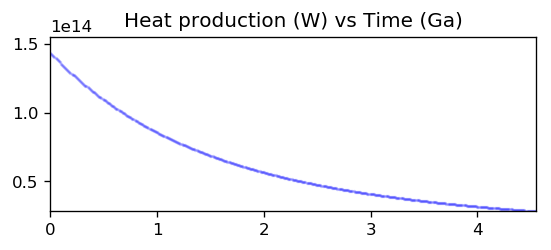

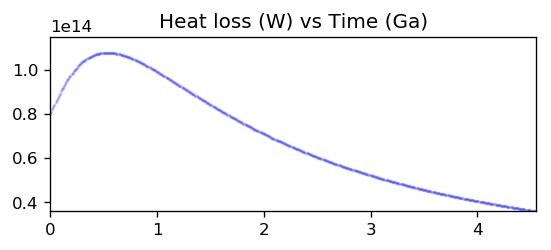

In [5]:
Temps=evolve.plot_heat(Evolution[:,(0,1)],"Temperature (C) vs Time (Ga)")
Rayleighs=evolve.plot_heat(Evolution[:,(0,2)],"Rayleigh number vs Time (Ga)")
Heat_production=evolve.plot_heat(Evolution[:,(0,3)],"Heat production (W) vs Time (Ga)")
Heat_loss=evolve.plot_heat(Evolution[:,(0,4)],"Heat loss (W) vs Time (Ga)")




# Compare evolution of multiple compositions.

In [6]:
Hts=[]             #A list of lists; column names are in get.keys['columns']
dt=0.01

minerals=('forsterite','fayalite','orthoenstatite','clinoenstatite','periclase', \
          'corundum','spinel','diopside','diamond','ca-al pyroxene')

for i in range(len(minerals)):
    
    t=0.0              #Keep Hts=[], Tp=Tp0, and t=0.0 here, so we can reset values and run again.
    Tp=Tp0
    fractions=[0.00, 0.00, 0.00, 0.00, 0.00, \
           0.00, 0.00, 0.00, 0.00, 0.00]
    
    fractions[i]=1.0
    
    start=time.time()
    while t <= tmax:
        alpha,cp,k=get.thermals(minerals,fractions,Tp)

        if method=='static':
            alpha,cp,k=get.thermals(minerals,fractions,1625)
            #alpha,cp,k,pm=3.7e-5,1250.,5.0,3340. #Uncomment for common benchmark values

        viscT=get.viscosity(Ev,visc0,Tp)
        Ra=get.rayleigh(d,g,pm,Tp,Ts,viscT,alpha,cp,k)

        production=evolve.produce_heat(Mp,Mc,Qp,t)
        loss=evolve.flux_heat(Sa,c1,k,Tp,d,Ra,Ev)
        dTp=(dt*get.seconds*(production-loss))/(cp*pm*Vm) #Potentially change to (cp*Mp)?
        Hts.append([t,Tp-273.15,Ra,production,loss,production/loss])

        Tp=Tp+dTp
        t=t+dt
    end=time.time()
    
Evolution=np.asarray(Hts)

print("Program running time: ", Pf(end-start), " seconds\n\n")
print("FINAL VALUES:")
print(get.keys['columns'])
print([Pf(t), Pf(Tp), Pe(Ra), Pe(production), Pe(loss), Pf(production/loss)])

Program running time:  0.0239  seconds


FINAL VALUES:
['time', 'temp', 'Ra', 'production', 'loss', 'urey']
['4.5600', '1885.4613', '8.6085e+09', '2.8137e+13', '3.5101e+13', '0.8016']


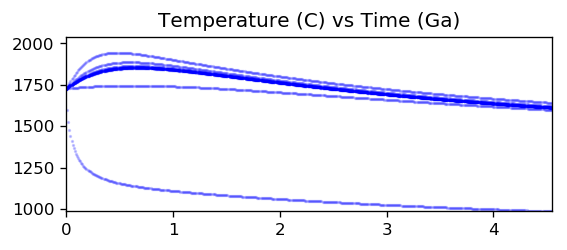

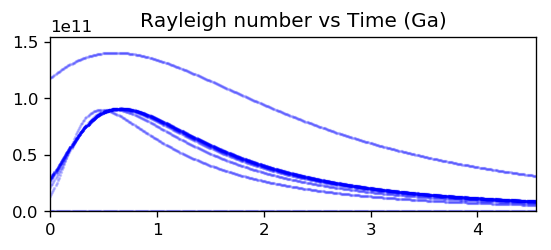

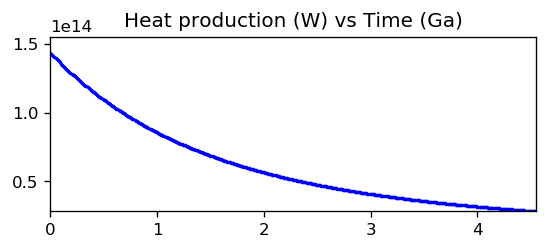

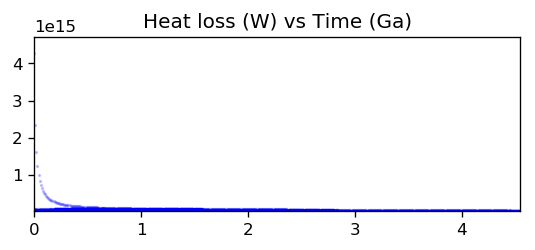

In [7]:
Temps=evolve.plot_heat(Evolution[:,(0,1)],"Temperature (C) vs Time (Ga)")
Rayleighs=evolve.plot_heat(Evolution[:,(0,2)],"Rayleigh number vs Time (Ga)")
Heat_production=evolve.plot_heat(Evolution[:,(0,3)],"Heat production (W) vs Time (Ga)")
Heat_loss=evolve.plot_heat(Evolution[:,(0,4)],"Heat loss (W) vs Time (Ga)")